In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Drug_Use_Data_from_Selected_Hospitals.csv'

import pandas as pd
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df

Mounted at /content/drive


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE
0,0,IP,NaN,NaN,NaN,1,01/01/2023,01/31/2023,57172.0000,Count
1,0,IP,NaN,NaN,NaN,2,02/01/2023,02/28/2023,51983.0000,Count
2,0,IP,NaN,NaN,NaN,3,03/01/2023,03/31/2023,58176.0000,Count
3,0,IP,NaN,NaN,NaN,4,04/01/2023,04/30/2023,54751.0000,Count
4,0,IP,NaN,NaN,NaN,5,05/01/2023,05/31/2023,57462.0000,Count
...,...,...,...,...,...,...,...,...,...,...
8387,6,IP,Cannabis overdose,Total,Total,23,11/01/2024,11/30/2024,2.0000,Percent
8388,6,IP,Benzodiazepine overdose,Total,Total,23,11/01/2024,11/30/2024,6.0000,Percent
8389,6,IP,Stimulants overdose,Total,Total,24,12/01/2024,12/31/2024,15.6250,Percent
8390,6,IP,Cannabis overdose,Total,Total,24,12/01/2024,12/31/2024,3.1250,Percent


In [ ]:
import pandas as pd

def duplicate_last_rows(df, n=50):
    """
    Duplicates the last n rows of a DataFrame and appends them to the end.

    Args:
        df (pd.DataFrame): The input DataFrame.
        n (int): The number of last rows to duplicate.

    Returns:
        pd.DataFrame: A new DataFrame with the duplicated rows appended.
    """
    if n > len(df):
        raise ValueError("n cannot be larger than the DataFrame length")

    last_rows = df.tail(n)
    df_duplicated = pd.concat([df, last_rows], ignore_index=True)
    return df_duplicated

if __name__ == '__main__':
  df_duplicated = duplicate_last_rows(df)
  df = df_duplicated
df

,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE
0,0,IP,NaN,NaN,NaN,1,01/01/2023,01/31/2023,57172.0000,Count
1,0,IP,NaN,NaN,NaN,2,02/01/2023,02/28/2023,51983.0000,Count
2,0,IP,NaN,NaN,NaN,3,03/01/2023,03/31/2023,58176.0000,Count
3,0,IP,NaN,NaN,NaN,4,04/01/2023,04/30/2023,54751.0000,Count
4,0,IP,NaN,NaN,NaN,5,05/01/2023,05/31/2023,57462.0000,Count
...,...,...,...,...,...,...,...,...,...,...
8437,6,IP,Cannabis overdose,Total,Total,23,11/01/2024,11/30/2024,2.0000,Percent
8438,6,IP,Benzodiazepine overdose,Total,Total,23,11/01/2024,11/30/2024,6.0000,Percent
8439,6,IP,Stimulants overdose,Total,Total,24,12/01/2024,12/31/2024,15.6250,Percent
8440,6,IP,Cannabis overdose,Total,Total,24,12/01/2024,12/31/2024,3.1250,Percent


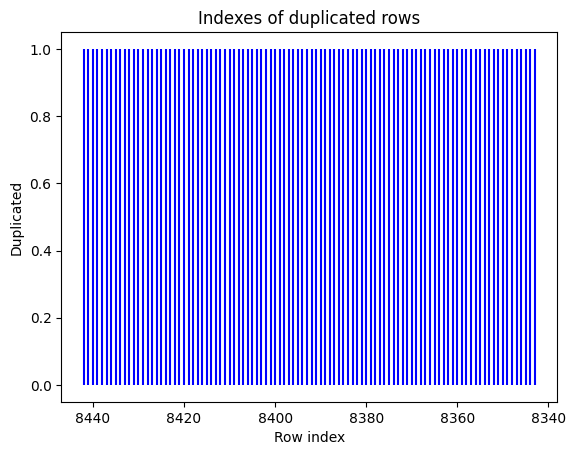

Number of duplicate rows: 50. This data is inconsistent.
Row Count with duplicates: 8442.


In [ ]:
import matplotlib.pyplot as plt
duplicates = df[df.duplicated(keep=False)]
  # Create a DataFrame to represent the duplicated rows and its indices
duplicated_rows = pd.DataFrame({
    'duplicated': df.duplicated(keep=False),
    'row': range(1, len(df) + 1)
    })
duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

# Plot vertical lines at the index of the duplicated rows
plt.figure()
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='blue')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

# Identify duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}. This data is inconsistent.")
row_count = len(df)
print(f"Row Count with duplicates: {row_count}.")

In [ ]:
def remove_duplicate_rows(df, subset_columns=None, keep='first'):
    """
    Removes duplicate rows from a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        subset_columns (list, optional): List of column names to consider for identifying duplicates.
            If None, all columns will be considered. Defaults to None.
        keep (str, optional): Specifies which duplicates to keep.
            'first': Keep the first occurrence.
            'last': Keep the last occurrence.
            False: Drop all duplicates. Defaults to 'first'.

    Returns:
        pd.DataFrame: A new DataFrame with duplicate rows removed.
    """

    df_no_duplicates = df.drop_duplicates(subset=subset_columns, keep=keep)
    return df_no_duplicates

if __name__ == '__main__':
  df_no_duplicates_all = remove_duplicate_rows(df)
  row_count = len(df_no_duplicates_all)
  print(f"Row Count: {row_count}.")
  print()

duplicate_count = df_no_duplicates_all.duplicated().sum()

# Print the count of duplicates
print(f"Number of duplicate rows: {duplicate_count}. This data is consistent.")
print()
print("DataFrame with duplicates removed based on all columns:\n", df_no_duplicates_all)

Row Count: 8392.

Number of duplicate rows: 0. This data is consistent.

DataFrame with duplicates removed based on all columns:
       FIGURE SETTING                INDICATOR  GROUP SUBGROUP  TIME  \
0          0      IP                      NaN    NaN      NaN     1   
1          0      IP                      NaN    NaN      NaN     2   
2          0      IP                      NaN    NaN      NaN     3   
3          0      IP                      NaN    NaN      NaN     4   
4          0      IP                      NaN    NaN      NaN     5   
...      ...     ...                      ...    ...      ...   ...   
8387       6      IP        Cannabis overdose  Total    Total    23   
8388       6      IP  Benzodiazepine overdose  Total    Total    23   
8389       6      IP      Stimulants overdose  Total    Total    24   
8390       6      IP        Cannabis overdose  Total    Total    24   
8391       6      IP  Benzodiazepine overdose  Total    Total    24   

      START_TIME 